In [1]:
ls ./data/kepler1656_spectra/

OLD_all_orders/        order13/               order5/
k00367_rj351.570.fits  order14/               order6/
k00367_rj487.76.fits   order15/               order7/
order1/                order16/               order8/
order10/               order2/                order9/
order11/               order3/
order12/               order4/


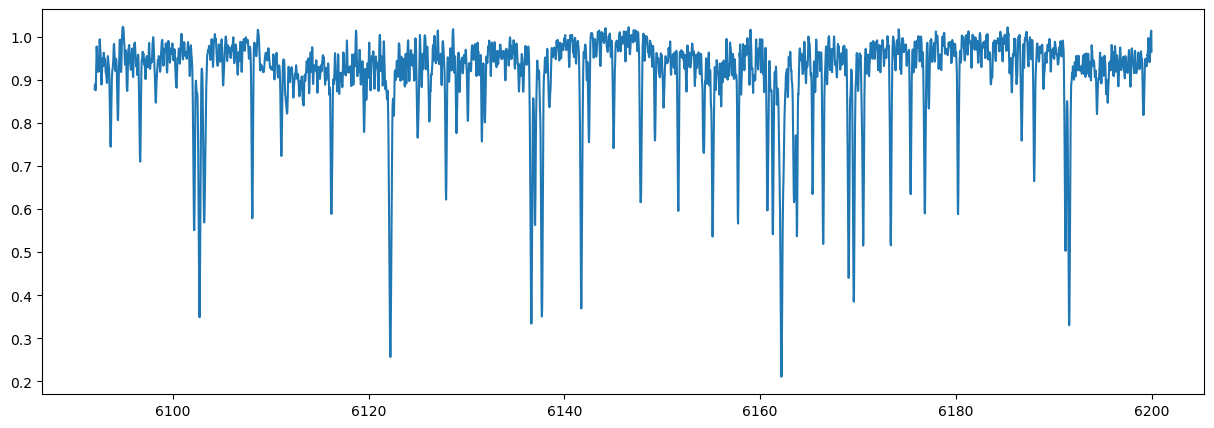

In [2]:
# inspired by Stumpe 2014, Figure 7
import dwt
from astropy.io import fits
from pylab import *

# load Kepler-1656 spectra
filename = './data/kepler1656_spectra/order14/k00367_rj487.76.fits'
file_data = fits.open(filename)[1].data

figure(figsize=(15,5))
plot(file_data.w, file_data.s)

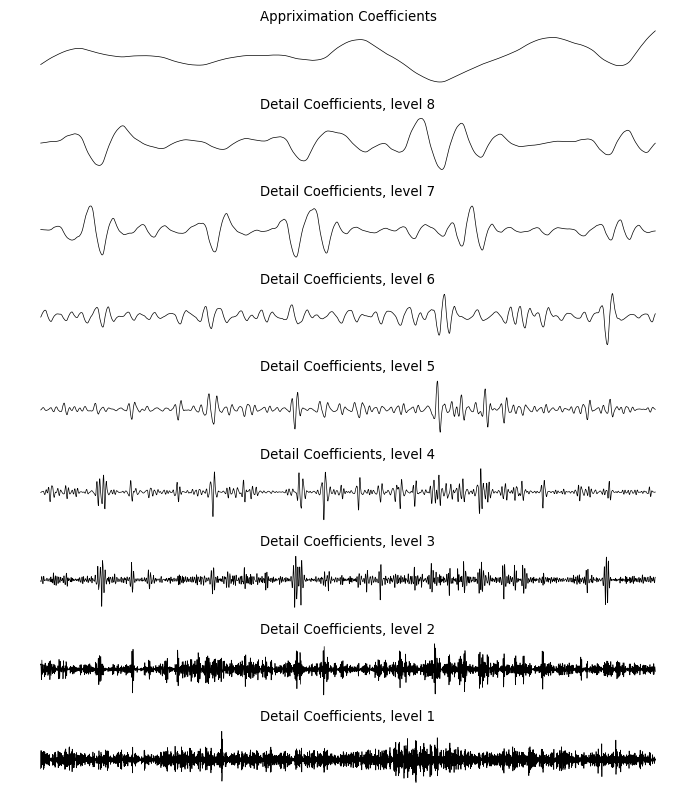

In [8]:
# I want to switch the order of these.
# axis 0 should be approximation coefficients


# store data
flux = file_data.s[:-1] # require even number of elements
w = file_data.w[:-1] # require even number of elements
wavelet_wavedec = 'sym5'
rcParams['font.size']=8

# set up subplots
max_level = dwt.pywt.dwt_max_level(len(flux), wavelet_wavedec)
n_levels = max_level + 1 # because the levels start at zero

fig, axes = subplots(n_levels, 1, sharex=True, sharey=False, 
    figsize=(7,8), tight_layout=True)

# plot decomposition levels
for coeff_idx in range(0, n_levels):
    # compute reconstructed flux for just that level
    idx_flux_waverec = dwt.flux_waverec(
        flux, 
        wavelet_wavedec,
        [coeff_idx])
    # plot filtered signal
    axis_n = coeff_idx#n_levels - 1 - coeff_idx
    axes[axis_n].plot(w, idx_flux_waverec, 'k-', lw=0.5)
    axes[axis_n].axis('off')
    # label signal
    if coeff_idx==0:
        label = 'Appriximation Coefficients'
    else:
        label = 'Detail Coefficients, level {}'.format(n_levels-coeff_idx)
    axes[axis_n].set_title(label)

# suptitle(object_name)
# supxlabel('wavelength (nm)')
# supylabel('flux')
# subplots_adjust(hspace=0.4)

(6086.617990383094, 6205.351539635377, -0.2, 1.3)

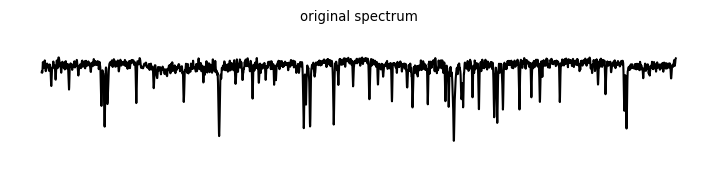

In [109]:
# okay, what can I add to this?
# maybe a plot on the left with the original spectrum
# and a plot on the left with the filtered spectrum?
# and I'd like to annotate with the scale or something...
# oh it would be cool to plot the wavelet next to it.
# bt I can think about this later.
# I need to clip the spectra.


figure(figsize=(9,2))
#axhline(1, color='r', alpha=0.5)
plot(w, flux, 'k-')
ylim(-0.2,1.3)
title('original spectrum')
axis('off')

(6092.886932977121, 6199.939648904018, -0.2, 1.3)

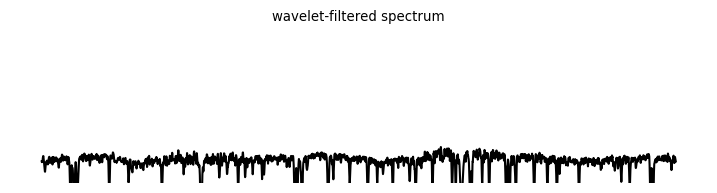

In [11]:
# next maybe I can plot th filtered one?
flux_wavedec, sigma_wavedec = dwt.load_spectrum(filename, True)



figure(figsize=(9,2))
#axhline(1, color='r', alpha=0.5)
plot(w[dwt.order_clip:-1*dwt.order_clip], flux_wavedec, 'k-')
ylim(-0.2,1.3)
title('wavelet-filtered spectrum')
axis('off')


